In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv(r'C:\Users\caixd\Downloads\ped-fusion-share\df1_v1a_out.csv')
df = data.copy()

def avg_speed_range(speed_str):
    speeds = [int(s.replace('mph', '').strip()) for s in speed_str.split('-')]
    return sum(speeds) / len(speeds)
  
df['speed_numeric'] = data['speed_type'].apply(avg_speed_range)

df = df.drop(columns = ['Street Nam', 'site_id','geometry','speed_type','holdout','_Date'])

In [4]:
numeric = df.drop(columns = ['season','class_type','crossing_class','crossing_island'])
print(numeric.columns)
cat = df[['season','class_type','crossing_class','crossing_island']]


Index(['Number of', 'pm_tot', 'stv_mi', 'stv_ann', 'swlk_cov', 'bus_stops',
       'isect_dens', 'hh', 'zch', 'pop_dens', 'med_inc', 'job_dens',
       'dist_CBD', 'Commercial Area', 'Retail Area', 'Park Area', 'swlk_len',
       'sig_int', 'sig_dens', 'tstop_dens', 'walk_comm', 'stv_mi_em',
       'swlk_len_em', 'bus_stops_em', 'sig_int_em', 'sig_dens_em',
       'isect_dens_em', 'hh_em', 'zch_em', 'med_inc_em', 'pop_dens_em',
       'walk_comm_em', 'job_dens_em', 'Commercial Area_em', 'Retail Area_em',
       'Park Area_em', 'transit_stops_em', 'stv_mi_qm', 'swlk_len_qm',
       'bus_stops_qm', 'sig_int_qm', 'sig_dens_qm', 'isect_dens_qm', 'hh_qm',
       'zch_qm', 'med_inc_qm', 'pop_dens_qm', 'walk_comm_qm', 'job_dens_qm',
       'Commercial Area_qm', 'Retail Area_qm', 'Park Area_qm',
       'transit_stops_qm', 'stv_mi_hm', 'swlk_len_hm', 'bus_stops_hm',
       'sig_int_hm', 'sig_dens_hm', 'isect_dens_hm', 'hh_hm', 'zch_hm',
       'med_inc_hm', 'pop_dens_hm', 'walk_comm_hm', 'job_d

In [ ]:
summary = numeric.describe().T

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.width', 1000)     
pd.set_option('display.float_format', '{:.2f}'.format)
print(summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])


                    count       mean        std      min       25%       50%        75%        max
Number of          101.00       3.85       0.41     3.00      4.00      4.00       4.00       5.00
pm_tot             101.00     126.47     149.08     0.00     30.00     72.00     148.00     650.00
stv_mi             101.00      76.41     114.83     0.00     11.26     32.87      82.25     699.64
stv_ann            101.00    4034.67    6062.92     0.00    594.52   1735.74    4342.74   36941.16
swlk_cov           101.00       0.87       0.21     0.12      0.75      0.99       1.00       1.17
bus_stops          101.00       0.73       0.87     0.00      0.00      0.00       1.00       3.00
isect_dens         101.00    1027.97     348.98   887.39    887.39    887.39     887.39    2662.18
hh                 101.00       4.52       4.12     1.21      2.66      3.37       4.21      31.44
zch                101.00       1.12       1.86     0.00      0.20      0.40       0.91      13.85
pop_dens  

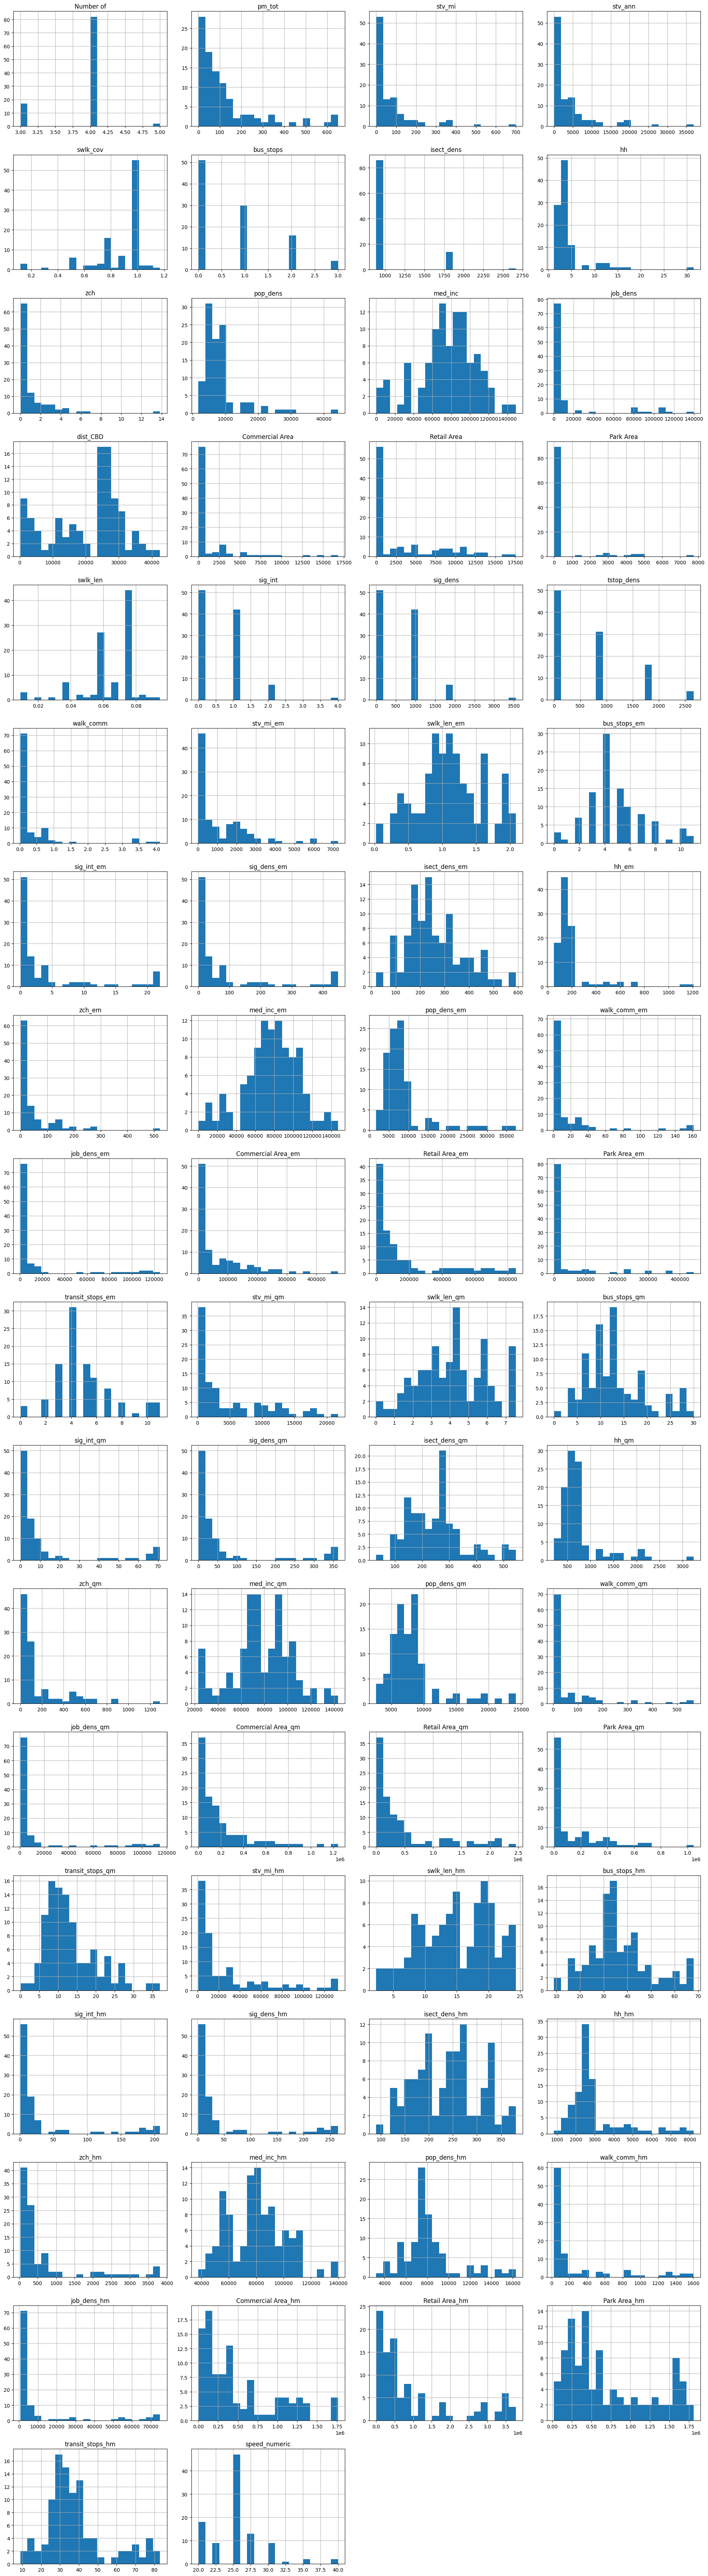

In [6]:

n_cols = 4
n_rows = (len(numeric.columns) // n_cols) + 1

numeric.hist(figsize=(20, n_rows * 4), bins=20, layout=(n_rows, n_cols))
plt.tight_layout()  
plt.show()

In [ ]:

import plotly.express as px
corr = numeric.corr()
fig = px.imshow(corr, color_continuous_scale='RdBu_r', range_color=[-1, 1])
fig.update_layout(width=1500, height=1500)
fig.show()



In [ ]:
mean_pm_by_season = df.groupby('season')['pm_tot'].mean()

print(mean_pm_by_season)
season_counts = df['season'].value_counts()
print(season_counts)

season
fall     216.56
spring    71.48
summer   193.11
winter    65.00
Name: pm_tot, dtype: float64
season
spring    50
summer    27
fall      16
winter     8
Name: count, dtype: int64


In [ ]:


cols = ['pm_tot', 'speed_numeric', 'stv_mi']
summary = df[cols].describe().T.round(2)

summary = summary.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Std Dev',
    'min': 'Min',
    '25%': 'Q1',
    '50%': 'Median',
    '75%': 'Q3',
    'max': 'Max'
})

summary.style.set_caption("Summary Statistics").format(precision=2)


,Count,Mean,Std Dev,Min,Q1,Median,Q3,Max
pm_tot,101.00,126.47,149.08,0.00,30.00,72.00,148.00,650.00
speed_numeric,101.00,25.22,3.89,20.00,22.50,25.00,27.50,40.00
stv_mi,101.00,76.41,114.83,0.00,11.26,32.87,82.25,699.64
